In [86]:
import alibi_detect
alibi_detect.od.__all__

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

from alibi_detect.od import IForest
from alibi_detect.datasets import fetch_kdd
from alibi_detect.utils.data import create_outlier_batch
from alibi_detect.utils.fetching import fetch_detector
from alibi_detect.saving import save_detector, load_detector
from alibi_detect.utils.visualize import plot_instance_score, plot_roc

from sklearn.model_selection import train_test_split


In [87]:
data = pd.read_csv("..\\data\\urls_with_features_selected.csv")
api_data = pd.read_csv("..\\data\\api_urls.csv")
X = data.loc[:, data.columns != 'type']
y = data['type']
X_api_data = api_data.loc[:, data.columns != 'type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
detector_name = 'IForest'

od = IForest(threshold=0.5,  # threshold for outlier score
                 n_estimators=100)
    
    # train
od.fit(X_train)

In [89]:
od.fit(X_train)

In [90]:
od.infer_threshold(
    X,
    threshold_perc=95
)

In [91]:
preds = od.predict(
   X_api_data, 
    return_instance_score=True
)

F1 score: 1.0000


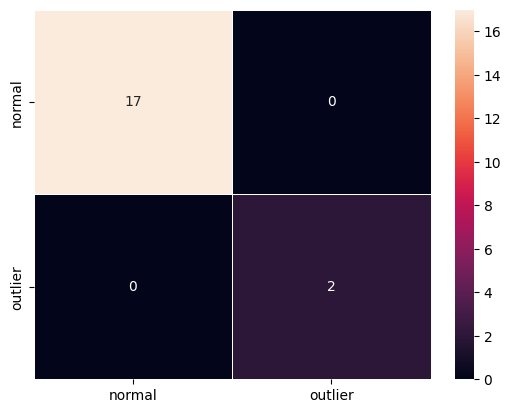

In [92]:
y_outlier = api_data['type'].values

labels = ["normal", "outlier"]

y_pred = preds['data']['is_outlier']

f1 = f1 = f1_score(y_outlier, y_pred)

print('F1 score: {:.4f}'.format(f1))

cm = confusion_matrix(y_outlier, y_pred)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
sns.heatmap(df_cm, annot=True, cbar=True, linewidths=.5)
plt.show()

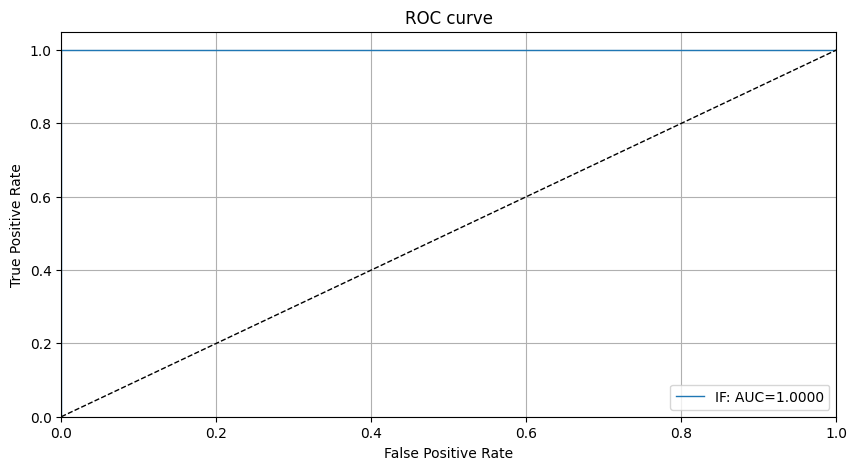

In [93]:
roc_data = {'IF': {'scores': preds['data']['instance_score'], 'labels': y_outlier}}
plot_roc(roc_data)

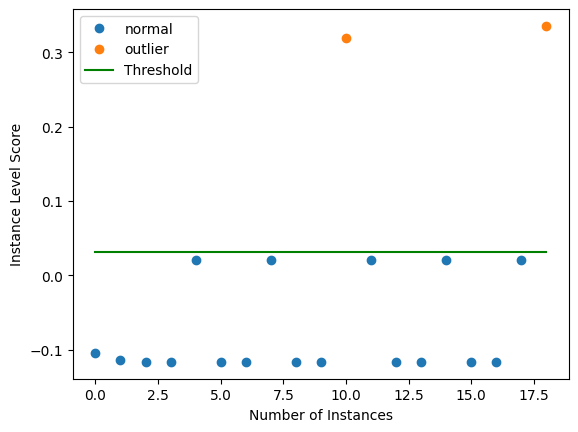

In [94]:
plot_instance_score(preds, y_outlier, labels, od.threshold)